In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


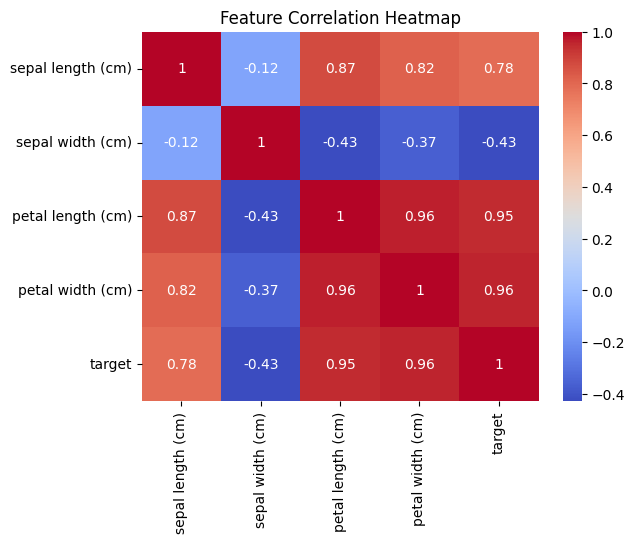

In [3]:
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [5]:
X = data[['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)']]  
y = data['petal length (cm)']  

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (120, 3)
Testing set size: (30, 3)


In [7]:
model = LinearRegression()
model.fit(X_train, y_train)
print("\nModel Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


Model Coefficients: [ 0.72281463 -0.63581649  1.46752403]
Model Intercept: -0.26219590258870396


In [8]:
y_pred = model.predict(X_test)
print("\nPredictions on the test set:")
print(y_pred)


Predictions on the test set:
[4.12771597 1.882002   7.02565911 4.43211007 4.92719101 2.06623661
 3.84947941 6.12949916 5.02174454 3.97445323 5.33653445 1.44661722
 1.78143162 1.45531704 1.44831322 4.54138026 5.75720255 3.8103012
 3.98534252 5.81208439 1.39392486 4.88106709 1.77711076 5.66533199
 5.96698503 6.04851788 5.63266411 5.99363605 1.74012203 1.52978798]


In [9]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nMean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 0.13001626031382701
R-squared (R²): 0.9603293155857663


C:\Users\HP\AppData\Local\Temp\ipykernel_4124\4147142082.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


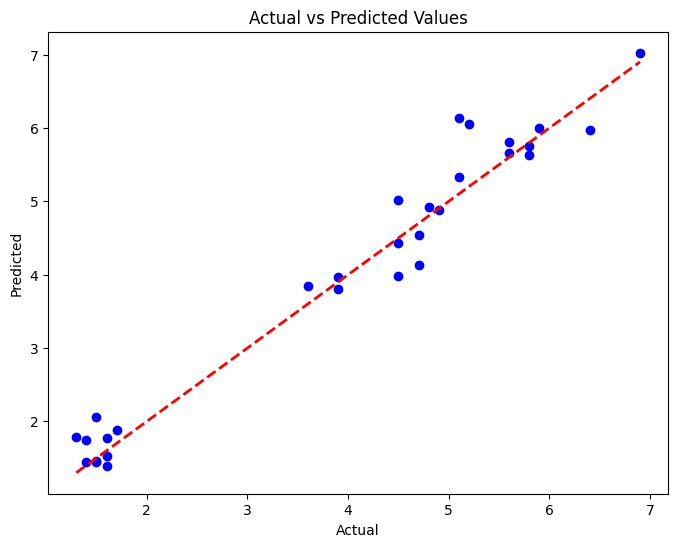

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Values")
plt.show()

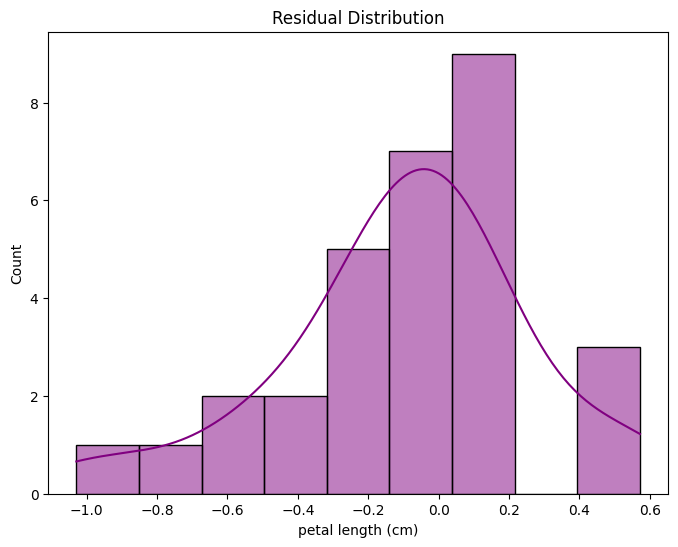

In [11]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title("Residual Distribution")
plt.show()